# Performing a Bell test
Performing a Bell test on quantum hardware using discopy.

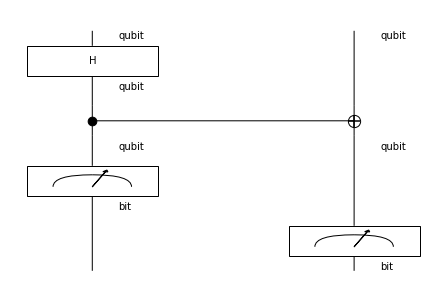

In [1]:
from discopy.quantum import *

circuit = H @ Id(1) >> CX >> Measure() @ Measure()
circuit.draw()

In [2]:
tk_circ = circuit.to_tk()
list(tk_circ)

[H q[0];, CX q[0], q[1];, Measure q[0] --> c[0];, Measure q[1] --> c[1];]

In [3]:
from pytket.extensions.qiskit import IBMQBackend, AerBackend

In [4]:
backend = IBMQBackend('ibmq_bogota')
# backend = AerBackend()
circuit.get_counts(
    backend=backend,
    n_shots=2**13,
    compilation=backend.default_compilation_pass(2)
)

Job Status: job has successfully run


{(0, 0): 0.4539794921875,
 (0, 1): 0.0257568359375,
 (1, 0): 0.0218505859375,
 (1, 1): 0.4984130859375}

In [5]:
(Ket(0, 0) >> H @ Id(1) >> CX >> Measure() @ Measure()).eval(mixed=True).array

array([[0.5+0.j, 0. +0.j],
       [0. +0.j, 0. +0.j]])

In [6]:
(Ket(0, 0) >> circuit)

Circuit(dom=Ty(), cod=bit @ bit, boxes=[Ket(0, 0), H, CX, Measure(), Measure()], offsets=[0, 0, 0, 0, 1])